# Netflix

**Ход работы:**
* Провести обзор данных
* Обработать данные 
* Анализ

* `show_id` - id
* `type` - тип/Жанр
* `title` - название
* `director` - режиссер 
* `cast` - отбор  
* `country` - страна
* `date_added` - дата добавления 
* `release_year` - год выпуска
* `rating` - возрастной рейтинг
* `duration` - продолжительность
* `listed_in` - где показаны
* `description` - описание


## Обзор данных

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


import warnings
warnings.filterwarnings(action='ignore')

In [59]:

data=pd.read_csv('netflix_titles.csv')

In [60]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Предъобработка данных 

    В данных имеются пропуски. 

    Удалим строки сроки со сзнчениями NaN в столбца, которые необходимы для анализа. Так как в стобце с режиссерами  много пропусков пока что трогать его не будем.  

In [62]:
data = data.dropna(subset=['rating','duration','country']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7970 entries, 0 to 7969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7970 non-null   object
 1   type          7970 non-null   object
 2   title         7970 non-null   object
 3   director      5747 non-null   object
 4   cast          7299 non-null   object
 5   country       7970 non-null   object
 6   date_added    7961 non-null   object
 7   release_year  7970 non-null   int64 
 8   rating        7970 non-null   object
 9   duration      7970 non-null   object
 10  listed_in     7970 non-null   object
 11  description   7970 non-null   object
dtypes: int64(1), object(11)
memory usage: 747.3+ KB


    Как видно данные стобца duration имеют неудобный формат для анализа. Добавим новый столбец в котором будет указано количество сезонов/минут одним числом 

In [63]:
data['seasons/min'] = data['duration'].apply(lambda x: int(str(x).split(' ')[0]))

## Анализ данных

### Посмотри, изменяется ли средняя продолжительность фильмов со временем  

In [64]:
data['Decade'] = (data['release_year']//10)*10

In [65]:
mean_time =data[data['type'] == 'Movie'].groupby('Decade').agg('mean')['seasons/min']

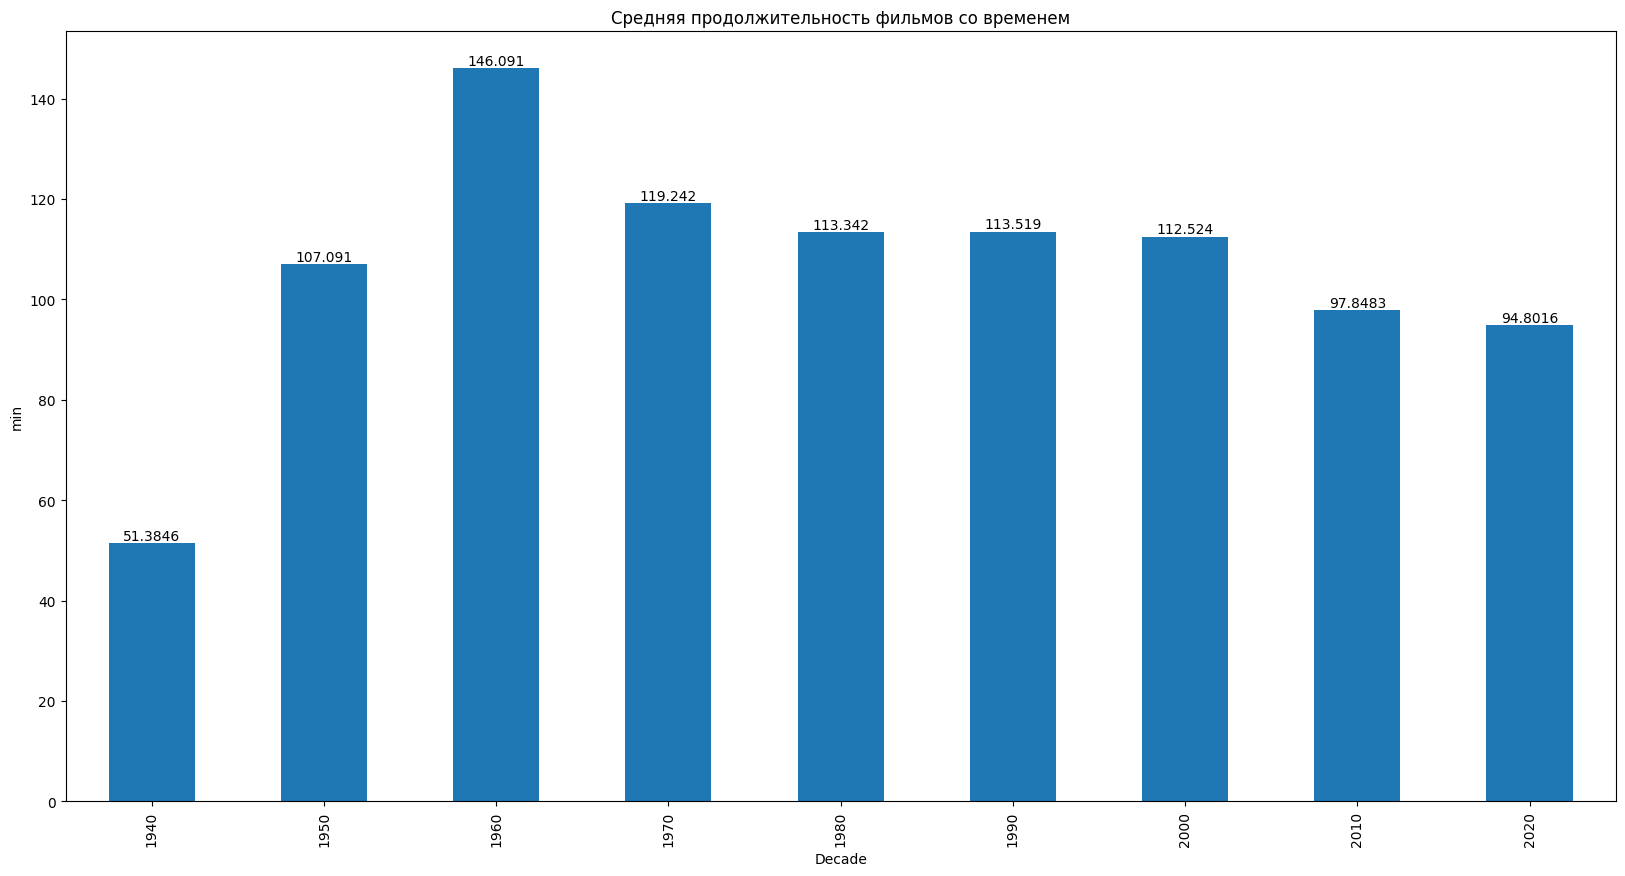

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
mean_time.plot(kind='bar')
plt.bar_label(ax.containers[0])
ax.set_title('Средняя продолжительность фильмов со временем')
plt.ylabel('min')
plt.show()

    В целом видно, что с 1960-х средняя длительность фильмов с годами уменьшается 

## Найдем режиссеров с наибольшим количеством фильмов

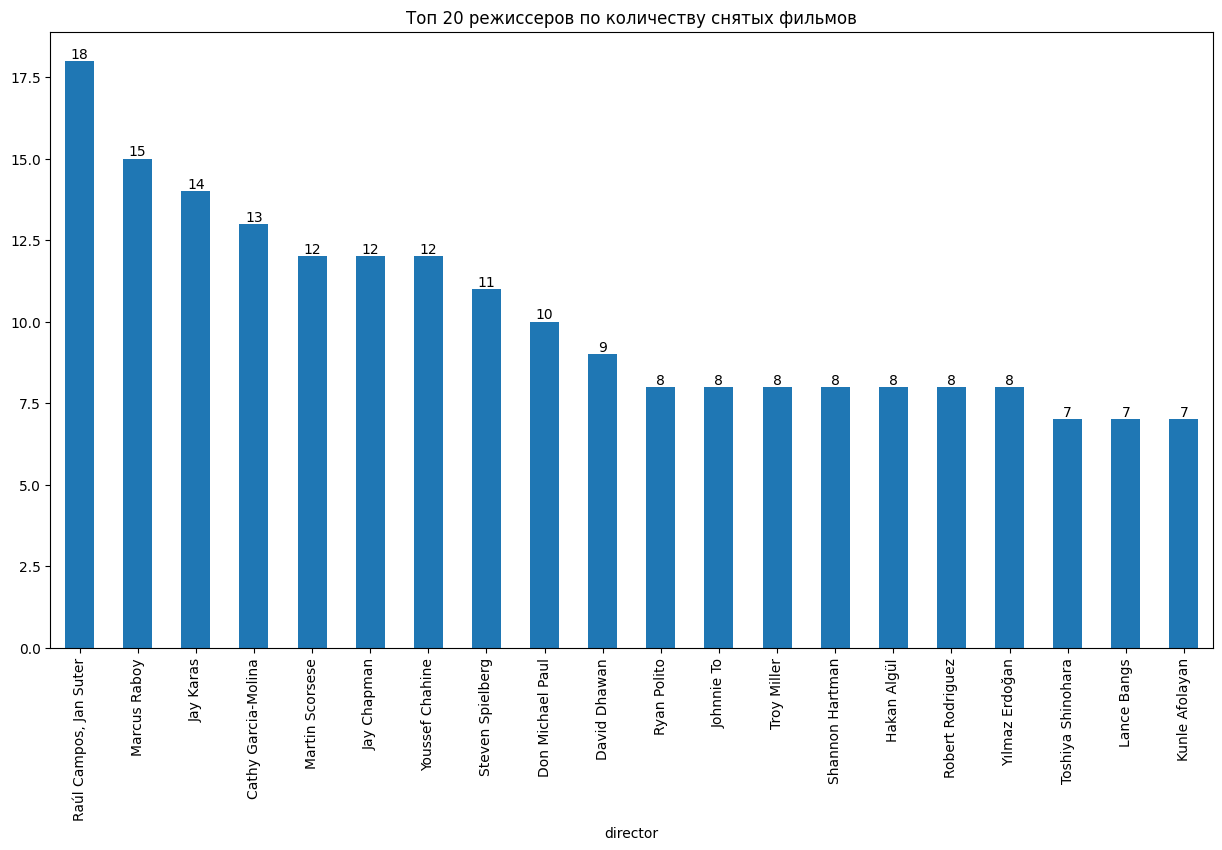

In [67]:
fig,ax=plt.subplots(figsize=(15,8))
data.groupby('director').count()['title'].sort_values(ascending=False).nlargest(20).plot(kind='bar')
ax.set_title('Топ 20 режиссеров по количеству снятых фильмов')
plt.bar_label(ax.containers[0])
plt.show()

## Какие тенденции наблюдаются у возрастных рейтингов фильмов и сериалов в зависимости от даты выпуска фильма

Описание возрастных рейтингов:
* `G` - Без ограничений 
* `PG` - Детям рекомендуется смотреть с родителями 
* `PG-13` - Дети до 13 лет допускаются только с родителями
* `R` - Подростки до 17 лет допускаются только с родителями 
* `NC-17` - Лица не достигшие 17 лет не допускаются
* `NR` - Без рейтинга
* `UR` - Без рейтинга

* `TV-14` - Дети до 14 лет допускаются только с родителями
* `TV-MA` - Лица не достигшие 17 лет не допускаются
* `TV-PG` - Рекомендуется смотреть с родителям
* `TV-Y` - Для всех детей 
* `TV-Y7` - Дети до 7 лет допускаются только с родителями
* `TV-Y7-FV` - Дети до 7 лет допускаются только с родителями (возможно фэнтезийное насилие)
* `TV-G` - Подходит для всех возростов 

In [68]:
data.rating.unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [69]:
data[data.type == 'Movie'].rating.unique()

array(['PG-13', 'TV-MA', 'TV-14', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7',
       'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [70]:
data[data.type == 'TV Show'].rating.unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'NR', 'R',
       'TV-Y7-FV'], dtype=object)

Рейтинги фильмов для программ и фильмов пересекаются. Приведем их к более удобному виду для дальнейшего анализа 

Заменим:
* `NC-17` на `TV-MA`
* `PG` на `TV-PG`
* `G`,`TV-Y` на `TV-G`
* `TV-Y7-FV` на `TV-Y7`


In [71]:
def transform_rating(x):
    if x=='NC-17':
        x='TV-MA'
    elif x=='PG':
        x='TV-PG'
    elif x in ['G','TV-Y']:
        x='TV-G'
    elif x=='TV-Y7-FV':
        x='TV-Y7'
    else:
        x=x
    return x

In [72]:
data['rating'] = data['rating'].apply(transform_rating)

In [73]:
df_by_r_d = (data[data.type == 'Movie'].groupby(['rating','Decade'])['type'].count()).reset_index()
df_by_r_d = df_by_r_d.merge(data[data.type == 'Movie'].groupby('Decade')['type'].count(),on='Decade')
df_by_r_d['norm_count']=df_by_r_d['type_x']/df_by_r_d['type_y']*100
df_by_r_d.groupby('Decade').sum()['norm_count']

Decade
1940    100.0
1950    100.0
1960    100.0
1970    100.0
1980    100.0
1990    100.0
2000    100.0
2010    100.0
2020    100.0
Name: norm_count, dtype: float64

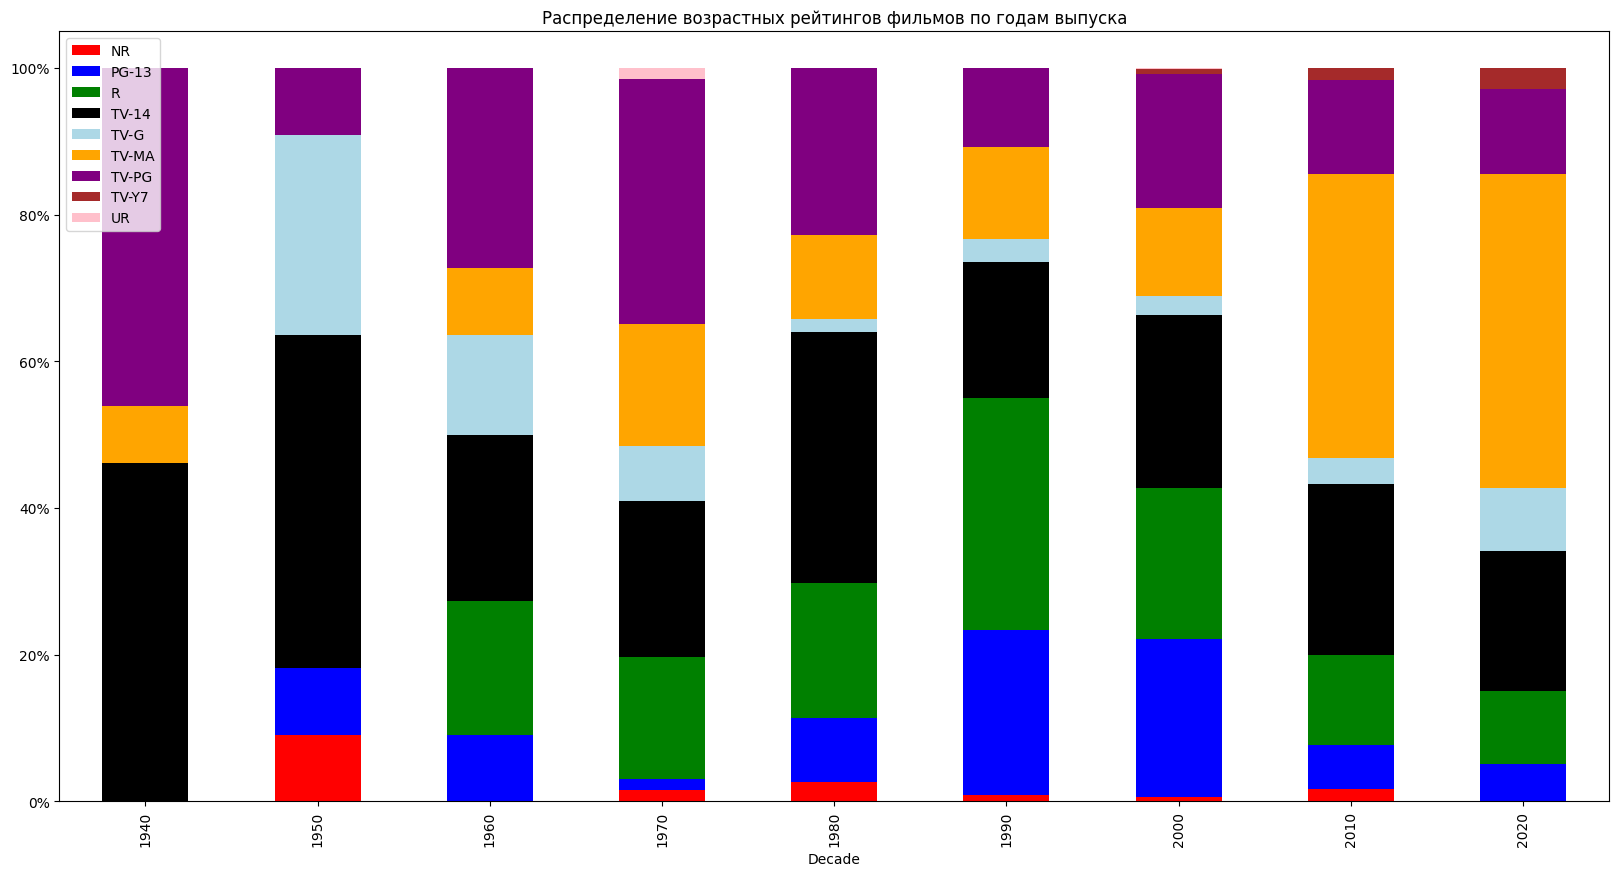

In [74]:
colors = ['red', 'blue', 'green', 'black', 'lightblue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'lime']

fig, ax = plt.subplots(figsize=(20, 10))
df_by_r_d.groupby(['Decade', 'rating'])['norm_count'].sum().unstack().plot(kind='bar',stacked=True,ax=ax,color=colors)
ax.set_title('Распределение возрастных рейтингов фильмов по годам выпуска')
ax.legend(loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Как видно изменения соотношений довольно хаотичные. Можно выделить значение `TV-MA`, доля которого за начиная с 2010-х заметно увеличилась

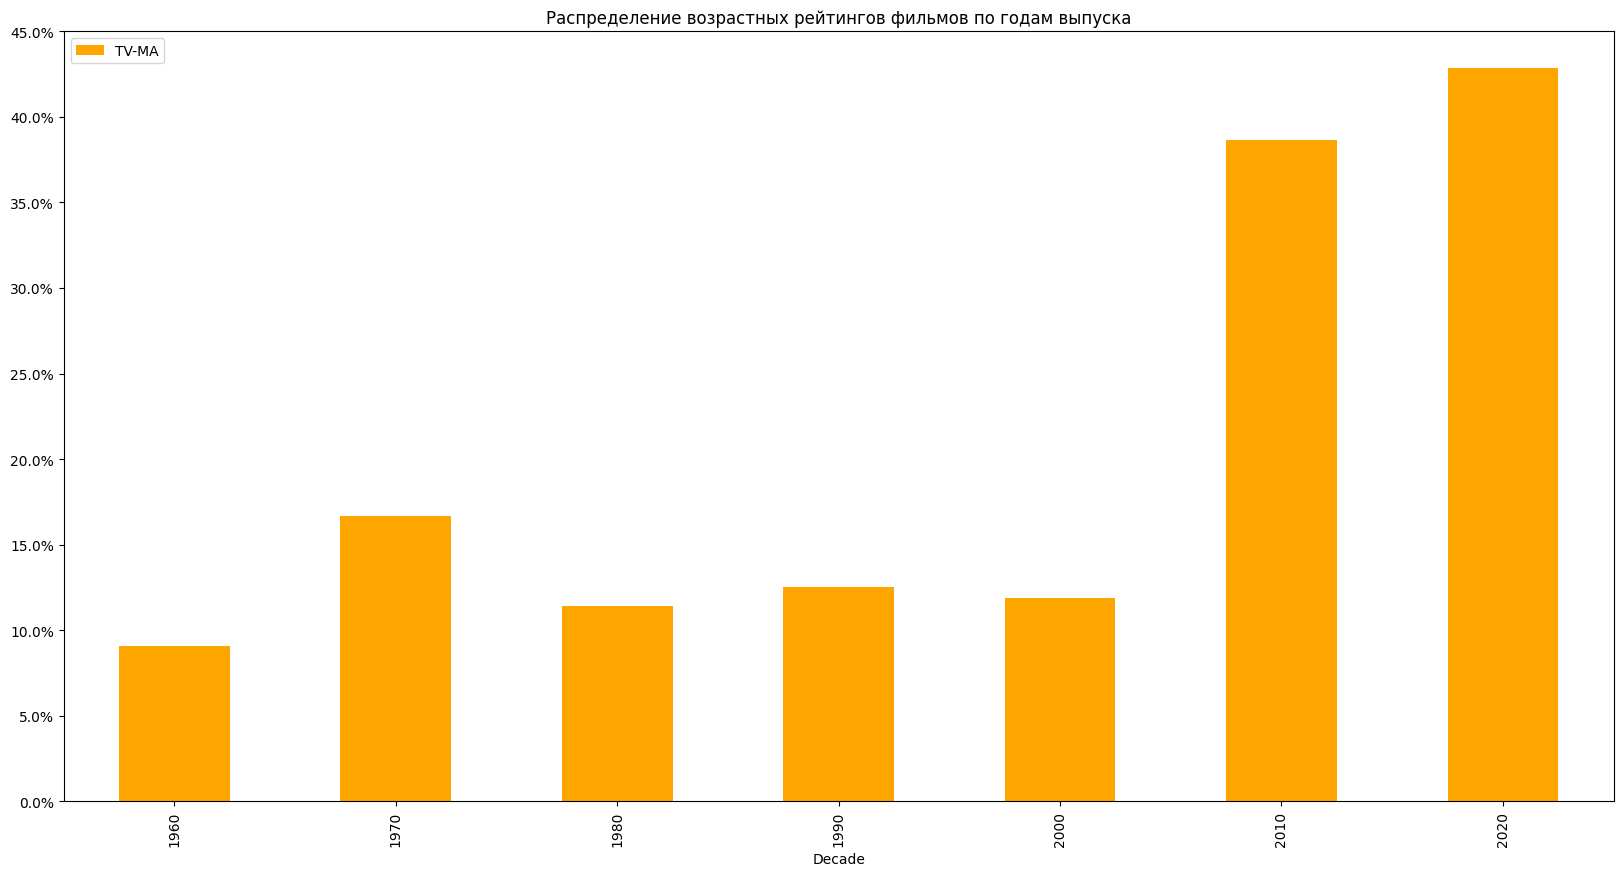

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
df_by_r_d.groupby(['Decade', 'rating'])['norm_count'].sum().unstack()['TV-MA'][2:].plot(kind='bar',stacked=True,ax=ax,color='orange')
ax.set_title('Распределение возрастных рейтингов фильмов по годам выпуска')
ax.legend(loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Посмотрим теперь соотношение для TV show

In [76]:
df_by_r_d_tv = (data[data.type == 'TV Show'].groupby(['rating','Decade'])['type'].count()).reset_index()
df_by_r_d_tv = df_by_r_d_tv.merge(data[data.type == 'TV Show'].groupby('Decade')['type'].count(),on='Decade')
df_by_r_d_tv['norm_count']=df_by_r_d_tv['type_x']/df_by_r_d_tv['type_y']*100
df_by_r_d_tv.groupby('Decade').sum()['norm_count']

Decade
1940    100.0
1960    100.0
1970    100.0
1980    100.0
1990    100.0
2000    100.0
2010    100.0
2020    100.0
Name: norm_count, dtype: float64

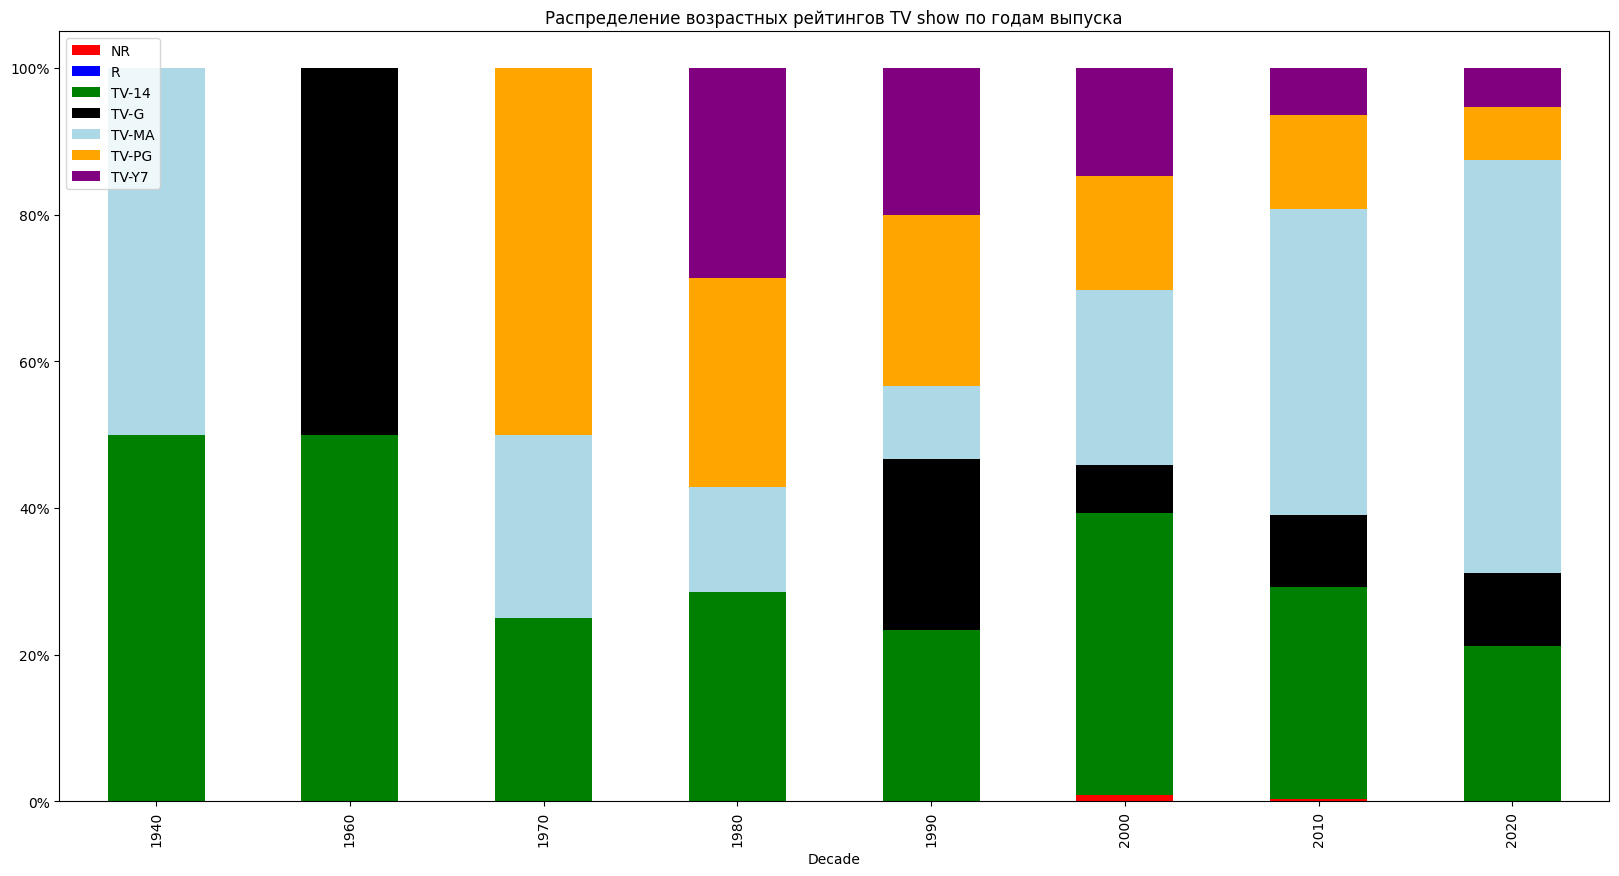

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
df_by_r_d_tv.groupby(['Decade', 'rating'])['norm_count'].sum().unstack().plot(kind='bar',stacked=True,ax=ax,color=colors)
ax.set_title('Распределение возрастных рейтингов TV show по годам выпуска')
ax.legend(loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Можно заметить, что начиная с 90-х увеличивается доля `TV-MA`. Доля TV-PG уменьшается с 1970-x. Также уменьшается доля TV-Y7 с 1980-х.

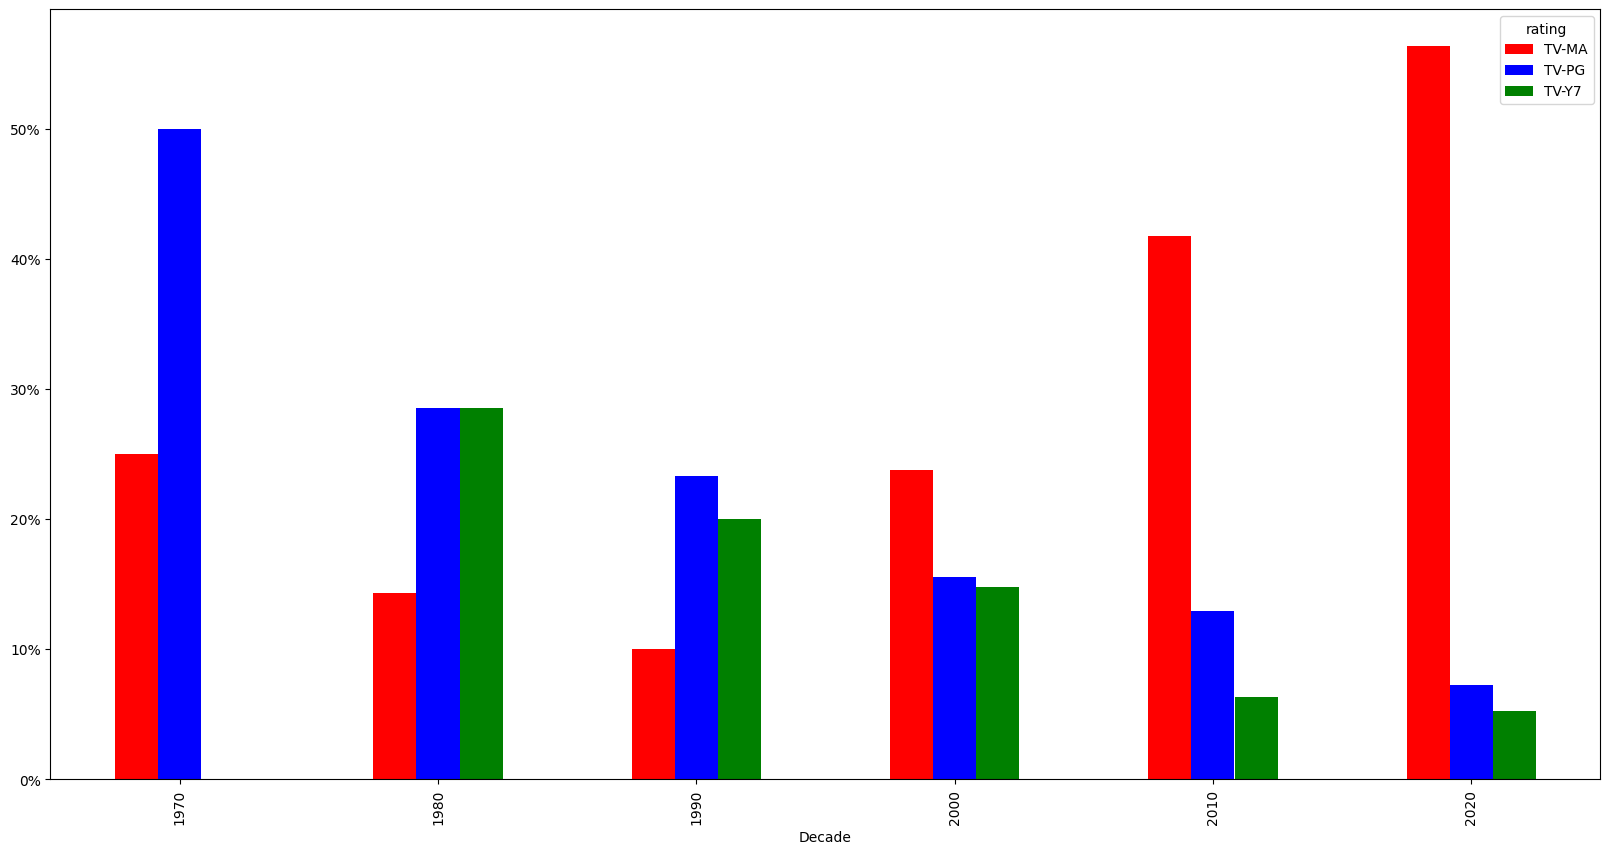

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
df_by_r_d_tv.groupby(['Decade', 'rating'])['norm_count'].sum().unstack()[['TV-MA','TV-PG','TV-Y7']].iloc[2:,:].plot(kind='bar',stacked=False,ax=ax,color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()